In [1]:
from reinvent.chemistry.standardization.rdkit_standardizer import (
    RDKitStandardizer,
)

In [ ]:
standardizer_iso = RDKitStandardizer(None, isomeric=True)
standardizer_non_iso = RDKitStandardizer(None, isomeric=False)

In [23]:
SMILES = "Clc1ccc(O[C@H]2CC[C@@H](CC2)NC(=O)CCSc2nc3ccccc3c(=O)[nH]2)cc1"

standard_smiles = standardizer.apply_filter(SMILES)
print(standard_smiles)

O=C(CCSc1nc2ccccc2c(=O)[nH]1)N[C@H]1CC[C@H](Oc2ccc(Cl)cc2)CC1


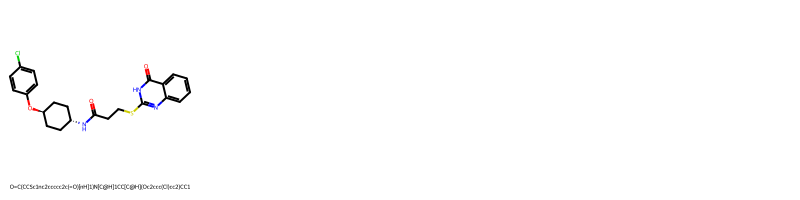

In [24]:
from rdkit.Chem import Draw
from rdkit import Chem
smiles_list = [standard_smiles]
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]
img_grid = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200,200), legends=smiles_list)
img_grid

In [12]:
smiles_list = [SMILES, standard_smiles]
mols3d = []
from rdkit.Chem import AllChem

for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)                                 # ⇢ explicit Hs
    # --- Embed with ETKDG ---
    AllChem.EmbedMolecule(mol, AllChem.ETKDGv3())         # single conformer
    # --- MMFF94 optimisation ---
    AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    mols3d.append(Chem.RemoveHs(mol))                     # back to implicit Hs for display


!pip install py3Dmol
import py3Dmol

def show3d(mol, style='stick', size=(300,300)):
    mb = Chem.MolToMolBlock(mol)
    view = py3Dmol.view(width=size[0], height=size[1])
    view.addModel(mb, 'sdf')
    view.setStyle({style:{}})
    view.zoomTo()
    return view.show()

show3d(mols3d[0]) 
show3d(mols3d[1])     # Benzene



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.